# K-평균 알고리즘 이해
#### K-평균은 군집화의 가장 일반적인 알고리즘이다. 특정한 임의의 지점을 선택새 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
#### 군집화를 하는 이유는 주어진 데이터가 얼마나 유사한지 파악하고, 유의미한 새로운 집단을 발견하기 위함
##### 하지만, 정답이 아닐수도 있기 때문에 예측을 위한 모델링보다는 EDA 사용
#### K-평균의 동작 방식
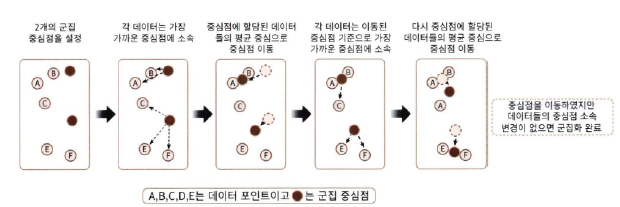
#### K-평균의 장점은 알고리즘이 쉽고, 간결하다
#### 단점은 거리 기반 알고리즘으로 속성의 개수가 많으면 군집 정확도가 떨어진다(PCA 차원 감소가 필요)
#### 그리고 반복 횟수에 따른 수행 시간이 길어지고, 처음 몇 개의 군집 포인트를 가이드할 지 어렵다

## 사이킷런 KMeans 클래스
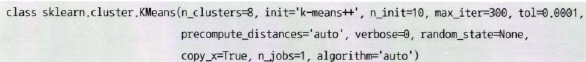
#### 중요 파라미터는 n_clusters(군집화할 개수), max_iter(최대 반복 횟수)이다
#### fit, fit_transform 메서드를 이용해 수행하면 된다.
#### 군집화 결과 속성은 labels_(군집 중심점 레이블), cluster_centers_(각 군집 중심점 좌표)이다.

## K-평균을 이용한 붗꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_lenght', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_lenght,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


#### 해당 데이터를 3개의 그룹으로 군집화를 진행한다

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


#### 실제 분류 값과얼마나 차이나는지 비교

In [5]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_lenght'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_lenght, dtype: int64


#### target 0 : 1번 군집으로 잘 그룹핑 됨
#### target 1 : 2번 군집의 2개를 제외한 나머지 48개가 0번 군집으로 잘 그룹핑 됨
#### target 2 : 0/2번 군집으로 분산되어 그룹핑 됨.

#### 붗꽃 데이터 군집화를 시각화 해보자 -> 속성이 4개이므로 2차원에 적합하지 않아 2개로 차원 축소(PCA)한 뒤 데이터를 표현한다

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_lenght,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


#### 산점도로 표현하되, 각 군집별로 군집 0은 마커 동그라미, 군집 1은 네모, 군집 2는 세모로 표현한다.

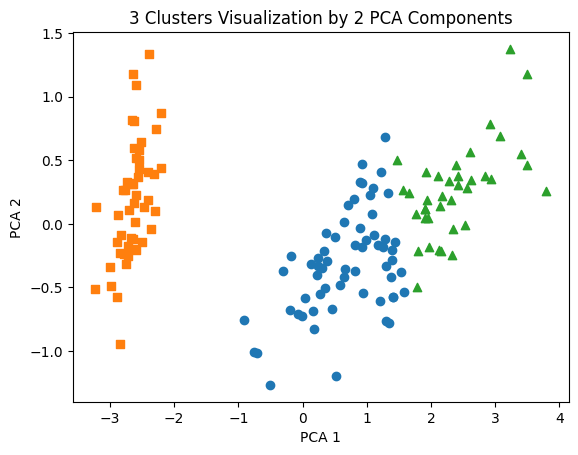

In [7]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

#### 군집1(네모)는 잘 분리되어 있지만, 군집0/군집1은 위치 상으로 분리되기 힘들다.

## 군집화 알고리즘 테스트를 위한 데이터 생성
#### 간단한 데이터 생성기인 make_blobs()와 make_classification() API가 있다.
#### 전자는 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있고, 후자는 노이즈를 포함한 데이터를 만드는데 유용하다.

#### make_blobs는 피처 데이터 세트와 타깃 데이터 세트가 투플로 반환된다.
#### 호출 파라미터는 아래와 같다.
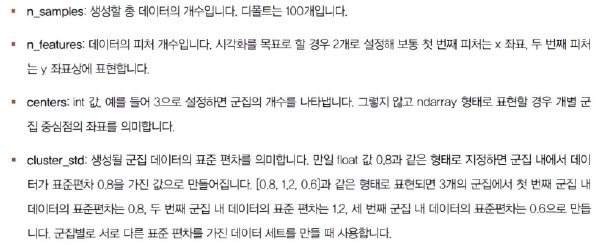

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 200개의 레코드와 2개의 피처, 3개의 군집, 군집 데이터의 표준 편차가 0.8인 피처/타깃 데이터 세트가 반환된다.
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


#### 3개의 군집, 각각 균일하게 구성되어 있다.

In [10]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


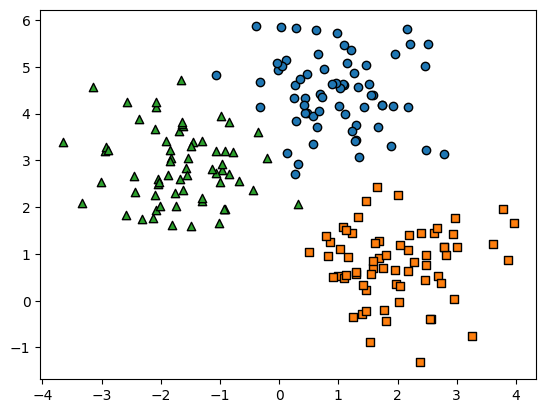

In [11]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

#### 이렇게 만들어진 데이터에 KMeans 군집화를 수행하고, 시각화 해보자

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# 중심 좌표 시각화를 위한 중심 좌표 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

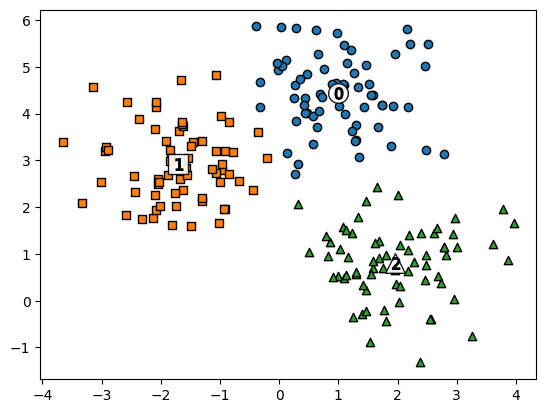

In [14]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    center_x_y = centers[label]
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [15]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


#### 매핑이 잘 된것을 확인할 수 있다.
#### make_blobs()는 cluster_std 파라미터로 데이터의 분포도를 조절한다.
#### cluster_std가 작을수록 군집 중심에 모여있고, 클수록 데이터가 퍼져있다.
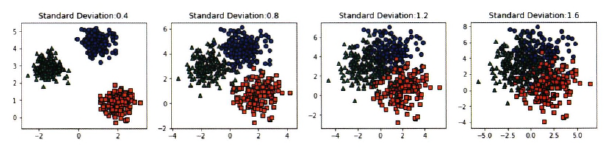